<a href="https://colab.research.google.com/github/JuanCappelletti/DEEP-LEARMING-ITBA/blob/main/MONTY%20HALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Problema de monthy Hall.*


**Declaraciones y variables**


In [281]:
%load_ext autoreload
%autoreload 2

import numpy as np  # libreria numpy
n=3       # Numero de puertas CREADAS Y A ELEGIR
PUERTAS=np.array(np.arange(1,n+1,dtype=int)) # creacion de las puertas a simular
CS=10000      # Cantidad de Simulaciones
#print (" Cantidad de puertas del juego ",PUERTAS)
Pos_AUTO=0          # Variable guarda la posicion que el auto esta
Elec_Jugador=0      # Variable guara la puerta que el jugador elijirá
Resto_puertas=0     # son las puertas que el jugador no eligio
Elec_final_jugador=[]  # Opciones aleatoria que el jugador debera aleatoriamente elegir
Aciertos_sin_cambio=0  # Cantidad de aciertos cuando el jugador nunca cambia de puerta
Aciertos_con_cambio=0  # Cantidad de aciertos cuando el jugador siempre cambia de puerta
Aciertos_aleatorios=0  # Cantidad de aciertos cuado el jugador cambia aleatoriamente de puerta.
Puerta_Monty=0         # Es la puerta final que el presentador deja cerrada.

Acu_Aciertos_sin_cambios=[0] # para graficos 
Acu_Aciertos_con_cambios=[0] # para graficos
Acu_Aciertos_aleatorios=[0] # para graficos


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
 Cantidad de puertas del juego  [1 2 3]


# *Simulación*

In [282]:
for i in range (CS):

  #Inicio de juego , Aleatoridad en la distribucion de valores.

  Pos_AUTO=np.random.choice(PUERTAS)    # asigna  Auto al azar.
  Elec_Jugador=np.random.choice(PUERTAS) # asigna eleccion de puerta al azar. 
  Resto_puertas=np.delete(PUERTAS,Elec_Jugador-1) # Puertas que no elijio el jugador y con las que el presentador podra optar mostrar.

  # Simulación de la partida.
  if Pos_AUTO==Elec_Jugador:  
      Aciertos_sin_cambio +=1     #Aciertos del Jugador si nunca cambia de puerta.
      #Acu_Aciertos_sin_cambios=np.append(Acu_Aciertos_sin_cambios,Aciertos_sin_cambio) # Acumula los aciertos en uan array 

  if Pos_AUTO !=Elec_Jugador:
      Aciertos_con_cambio +=1     #Aciertos del presentador,  que si el jugador siempre elige cambiar se tranfieren él.
      #Acu_Aciertos_con_cambios=np.append(Acu_Aciertos_con_cambios,Aciertos_con_cambio) # Acumula los aciertos en uan array 

  # Simulación para cambio aleatorio.
  if Pos_AUTO==Resto_puertas[0]:
       Puerta_Monty=Resto_puertas[0]  # El presentador deja esta puerta cerrada si es la que tiene el auto 
  elif Pos_AUTO==Resto_puertas[1]:
       Puerta_Monty=Resto_puertas[1]  # El presentador deja esta puerta cerrada si es la que tiene el auto 
  else :
       Puerta_Monty=np.random.choice( Resto_puertas) # Si el presentador no tiene el auto, es indistinto cual habra. ( se elige aleatoriamente).

  Elec_final_jugador=[Elec_Jugador,Puerta_Monty]   # Array con la pueta del jugador y la puerta que el presentador dejo cerrada.

  #Evaluación del cambia aleatoria de las puetas finales.
  if Pos_AUTO==np.random.choice(Elec_final_jugador):
      Aciertos_aleatorios +=1
      #Acu_Aciertos_aleatorios=np.append(Acu_Aciertos_aleatorios,Aciertos_aleatorios) # Acumula los aciertos en uan array 

#print("El auto esta en la puerta:  ",Pos_AUTO ,"\nEl jugador eligio la puerta:  ", Elec_Jugador,"\nEl presentador pueder jugar con las puertas: ", Resto_puertas)
#print("\nPuerta que el presentador dejo cerrada:",Puerta_Monty)
print("\n\nAciertos cuando el jugador nuca cambio de puerta:  ",Aciertos_sin_cambio,
      "\nAciertos cuando el jugador siempre cambio de puerta:  ", Aciertos_con_cambio,"\nAciertos con cambios aleatorios de puerta:  ",Aciertos_aleatorios)
#print(Acu_Aciertos_sin_cambios)
#print(Acu_Aciertos_con_cambios)
#print(Acu_Aciertos_aleatorios)
Acu_Aciertos_sin_cambios.append(Aciertos_sin_cambio) # Acumula los aciertos en uan array
Acu_Aciertos_con_cambios.append(Aciertos_con_cambio) # Acumula los aciertos en uan array
Acu_Aciertos_aleatorios.append(Aciertos_aleatorios) # Acumula los aciertos en uan array



Aciertos cuando el jugador nuca cambio de puerta:   3286 
Aciertos cuando el jugador siempre cambio de puerta:   6714 
Aciertos con cambios aleatorios de puerta:   5026


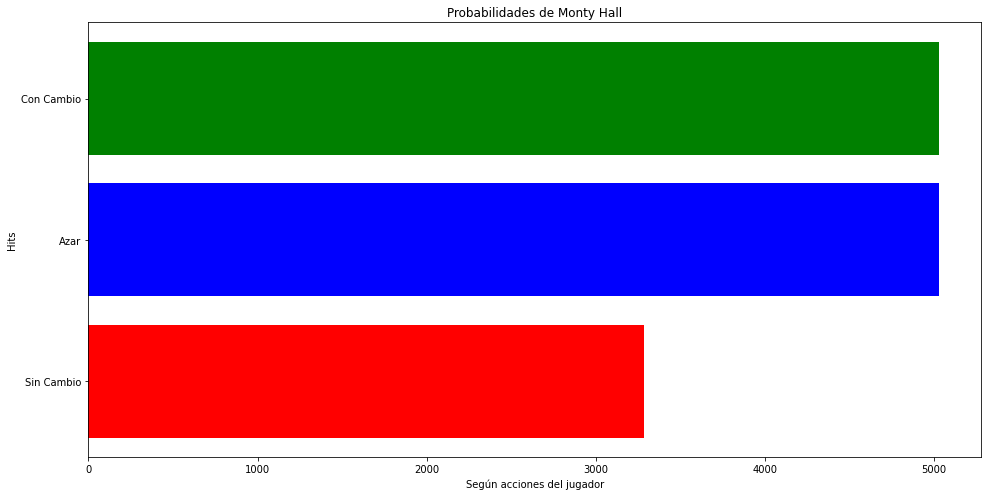

In [283]:

# Graficos 

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title("Probabilidades de Monty Hall")
plt.xlabel("Según acciones del jugador")
plt.ylabel("Hits")
x=['Sin Cambio','Azar','Con Cambio']
y=[Aciertos_sin_cambio,Aciertos_aleatorios,Aciertos_aleatorios]
colores=['red','blue','green']

plt.barh(x,y,color=colores)
plt.ylim=8000

plt.show()


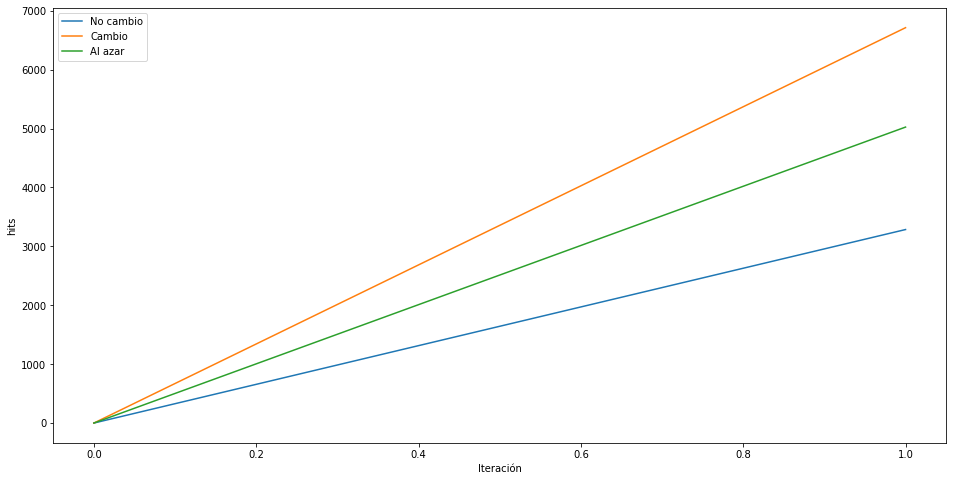

In [284]:
plt.figure(figsize=(16,8))
plt.plot(Acu_Aciertos_sin_cambios, label='No cambio')
plt.plot(Acu_Aciertos_con_cambios, label='Cambio')
plt.plot(Acu_Aciertos_aleatorios, label='Al azar')
plt.xlabel('Iteración')
plt.ylabel('hits')
plt.legend()
plt.show()